In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task 1: Implementation of Traditional Key Point Detection Algorithm (HOG)**


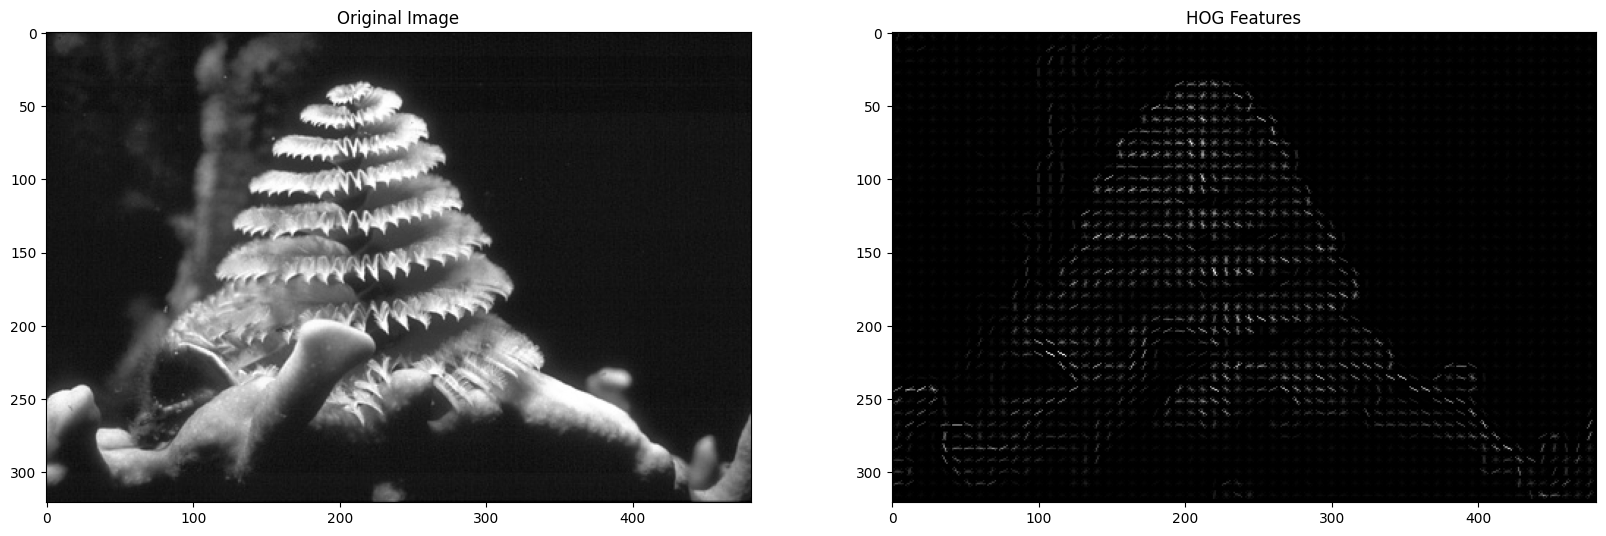

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MV/Lab 2/MVLAB_IMAGES/Ex-3images/12074.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.show()

# **Task 2: Implementation of Deep Learning-Based Key Point Detection Algorithm**


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

k = 7 # number of key points

def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2*k))  # key points, each with x and y coordinates
    return model

model = create_model((224, 224, 3))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           7,182 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,403,278 (169.39 MB)

 Trainable params: 44,403,278 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

# **Task 3: Dataset Loading and Preprocessing**


In [22]:
# !pip install fiftyone

import fiftyone as fo
import fiftyone.zoo as foz

# Download the COCO-2017 validation dataset (smaller for demonstration)
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_dir="/content/drive/MyDrive/coco-2017",  # Specify download location
    max_samples=200,  # Limit to 100 samples (optional)
    # Remove any extra 'dataset_dir' from kwargs
)

# Print dataset information
print(dataset)

# Launch the FiftyOne App to visualize the dataset (optional)
session = fo.launch_app(dataset)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


196 images found; downloading the remaining 4


INFO:fiftyone.utils.coco:196 images found; downloading the remaining 4


 100% |██████████████████████| 4/4 [660.4ms elapsed, 0s remaining, 6.2 images/s]      


INFO:eta.core.utils: 100% |██████████████████████| 4/4 [660.4ms elapsed, 0s remaining, 6.2 images/s]      


Writing annotations for 200 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 200 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


TypeError: fiftyone.utils.data.importers.build_dataset_importer() got multiple values for keyword argument 'dataset_dir'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory('/content/drive/MyDrive/coco-2017',
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='training')

val_data = datagen.flow_from_directory('/content/drive/MyDrive/coco-2017',
                                       target_size=(224, 224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       subset='validation')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/coco-2017'

# **Task 4: Key Point Detection Simulation**

In [ ]:
for i in range(5):
    img, _ = train_data.next()
    img = img[0]  # Take the first image from the batch
    img_gray = cv2.cvtColor(np.uint8(img*255), cv2.COLOR_BGR2GRAY)

    hog_features, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.show()

history = model.fit(train_data, epochs=10, validation_data=val_data)

NameError: name 'train_data' is not defined

# **Task 5: Performance Evaluation**

In [ ]:
import time

_, deep_learning_accuracy = model.evaluate(val_data)

start_time = time.time()
for i in range(len(val_data)):
    img, _ = val_data.next()
    img_gray = cv2.cvtColor(np.uint8(img[0]*255), cv2.COLOR_BGR2GRAY)
    hog_features, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
end_time = time.time()

hog_time = end_time - start_time
print(f"Traditional HOG processing time: {hog_time:.2f} seconds")

start_dl = time.time()
model.predict(val_data)
end_dl = time.time()

dl_time = end_dl - start_dl
print(f"Deep Learning processing time: {dl_time:.2f} seconds")

# **Task 6: Result Visualization**


In [ ]:
import seaborn as sns

# Visualize deep learning predictions as heatmap (assuming 7 keypoints per image)
def visualize_keypoints(image, keypoints):
    plt.imshow(image)
    for i in range(0, len(keypoints), 2):
        plt.scatter(keypoints[i], keypoints[i+1], color='r')
    plt.show()

for i in range(5):
    img, _ = val_data.next()
    pred = model.predict(np.expand_dims(img[0], axis=0))
    visualize_keypoints(img[0], pred[0])